# First MgII simple wind for M82

In [4]:
%matplotlib inline

In [1]:
from astropy.units import Unit

## Description
* Constant density
  * Chosen to give $\tau \approx 1$ through 1kpc
  * Assuming 1/10 down from dust and 1/2 from metallicity (-5.47 factor)
* Constant velocity

In [34]:
# constants
cst = 1./((const.m_e.cgs*const.c.cgs / (np.pi * 
    (const.e.esu**2).cgs)).to(u.AA*u.s/(u.km*u.cm**2)))

In [11]:
# Atomic data
fval = 0.6123
wave = 2796.352*u.AA

In [39]:
n0  = 0.0005 / (u.cm)**3
b = 15.*u.km/u.s
N_MgII = (n0 * (1.*u.kpc).to('cm') * 10**(-5.47)).to('cm**-2')
tau =  (N_MgII * cst * wave * fval  / (np.sqrt(np.pi) * b)).decompose()
print('tau={:g} for N_MgII={:g}'.format(tau,N_MgII))

tau=0.893538 for N_MgII=5.22782e+12 1 / cm2


## Generate the grid

In [1]:
import grid_m82 as gm82

In [38]:
# main call
reload(gm82)
param=gm82.init_param(ngrid=200)
param['flag_density'] = 0
param['flag_wind'] = 0
param['title'] = 'M82_first'
out_arrays = gm82.main(param,out_root='M82_first')

Done making cells
Done with radius
Done with density
Done with velocity
Wrote: M82_first.fits
Wrote M82_first.asc


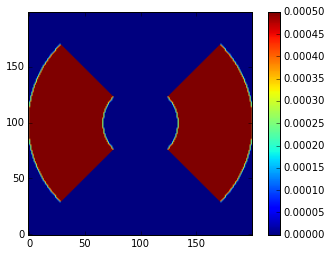

In [39]:
# Chk output
tst=True
if tst:
    rho_grid = out_arrays[0]
    emiss = out_arrays[5]
    plt.clf()
    plt.imshow(rho_grid[:,100,:],origin='lower')
    #plt.imshow(emiss[:,101,:],origin='lower')
    plt.colorbar()
    plt.show()

## Run

    cp m82_first_param.lua param.lua
    make
    mpirun -np 8 a.out
    
Running with theta=0, 90deg (face-on, edge-on)

## Generate Grid FITS file

In [7]:
import grid_utils as gridu

In [ ]:
reload(gridu)
#gridu.monte_to_fits('First/spec.dat', 'M82_first_faceon_monte.fits')
gridu.monte_to_fits('First/spec.dat', 'M82_first_edgeon_monte.fits')

> /Users/xavier/RT/M82/Analysis/Grids/py/grid_utils.py(53)monte_to_fits()
-> nrm = 1.
(Pdb) L_tot
4453.998136915


## View

In [9]:
%matplotlib inline

### Faceon

In [41]:
# Read
grid_hdu = fits.open('M82_first_faceon_monte.fits')
data = grid_hdu[0].data
wave = grid_hdu[1].data

In [42]:
# Collapsed Image
image = np.sum(data,2)
# Spectrum
flux = np.sum(data,0)
flux = np.sum(flux,0)

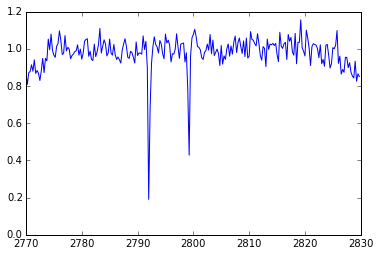

In [43]:
# Spectrum
xdb.xplot(wave,flux)

/Users/xavier/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


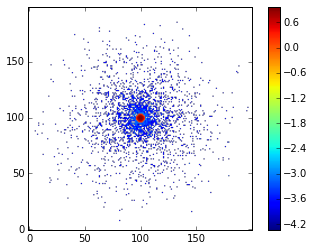

In [44]:
# Image
plt.clf()
plt.imshow(np.log10(image[:,:]), origin='lower')
#plt.imshow(data[:,:,109])
#plt.imshow(np.log10(data[:,:,109]),origin='lower')
plt.colorbar()
plt.show()

### Edge-on

In [45]:
# Read
grid_hdu = fits.open('M82_first_edgeon_monte.fits')
data = grid_hdu[0].data
wave = grid_hdu[1].data

In [46]:
# Collapsed Image
image = np.sum(data,2)
# Spectrum
flux = np.sum(data,0)
flux = np.sum(flux,0)

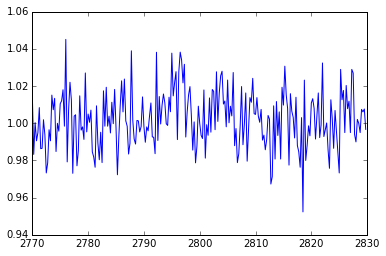

In [47]:
# Spectrum
xdb.xplot(wave,flux)

/Users/xavier/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


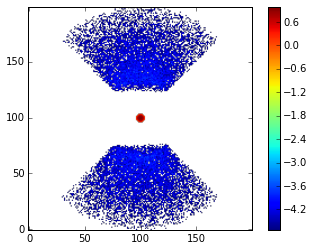

In [49]:
# Image
plt.clf()
plt.imshow(np.log10(image[:,:]), origin='lower')
#plt.imshow(data[:,:,109])
#plt.imshow(np.log10(data[:,:,19]),origin='lower')
plt.colorbar()
plt.show()

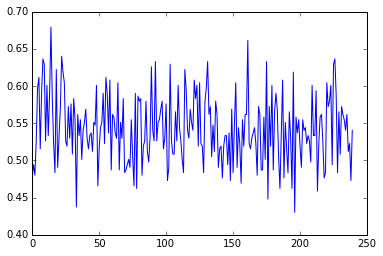

In [61]:
xdb.xplot(data[101,101,:]/0.054)

In [59]:
len(wave)*(wave[1]-wave[0]) * (0.03)**2

0.053999999999999999